In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data into pandas DataFrames (assuming you have loaded data into df_investments, df_vehicle_sales, and df_stamps)
# Example: df_investments = pd.read_csv('investments_data.csv')
# Similarly load data for vehicle sales and stamps revenue


In [2]:
df_1 = pd.read_csv("fact_TS_iPASS.csv")
df_2 = pd.read_csv("fact_stamps.csv")
df_3 = pd.read_csv("fact_transport.csv")

In [3]:
# Convert dist_code to string
df_1['dist_code'] = df_1['dist_code'].astype(str)
df_2['dist_code'] = df_2['dist_code'].astype(str)
df_3['dist_code'] = df_3['dist_code'].astype(str)

# Convert month to datetime
df_1['month'] = pd.to_datetime(df_1['month'])
df_2['month'] = pd.to_datetime(df_2['month'])
df_3['month'] = pd.to_datetime(df_3['month'])

In [4]:
merged_df = pd.merge(df_1, df_2, on=['dist_code', 'month'], how='inner')
merged_df = pd.merge(merged_df, df_3, on=['dist_code', 'month'], how='inner')

In [5]:
# Filter data for FY 2021 and 2022
start_date = pd.to_datetime('2021-04-01')
end_date = pd.to_datetime('2022-03-31')
merged_df = merged_df[(merged_df['month'] >= start_date) & (merged_df['month'] <= end_date)]

In [6]:
# Select columns of interest
columns_of_interest = ['investment in cr', 'documents_registered_rev', 'estamps_challans_rev', 'fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others', 'vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture', 'vehicleClass_others']

In [7]:
# Filter columns and convert to numeric
selected_df = merged_df[columns_of_interest].apply(pd.to_numeric, errors='coerce')

In [8]:
# Drop rows with NaN values
selected_df = selected_df.dropna()

In [9]:
# Calculate correlation matrix
correlation_matrix = selected_df.corr()

In [10]:
# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                           investment in cr  documents_registered_rev  \
investment in cr                   1.000000                  0.103483   
documents_registered_rev           0.103483                  1.000000   
estamps_challans_rev               0.107533                  0.996654   
fuel_type_petrol                   0.112203                  0.915393   
fuel_type_diesel                   0.114400                  0.902967   
fuel_type_electric                 0.111097                  0.923359   
fuel_type_others                   0.175820                  0.612239   
vehicleClass_MotorCycle            0.113156                  0.899000   
vehicleClass_MotorCar              0.110930                  0.949954   
vehicleClass_AutoRickshaw          0.093431                 -0.251744   
vehicleClass_Agriculture          -0.033533                 -0.356746   
vehicleClass_others                0.109850                  0.913471   

                           est

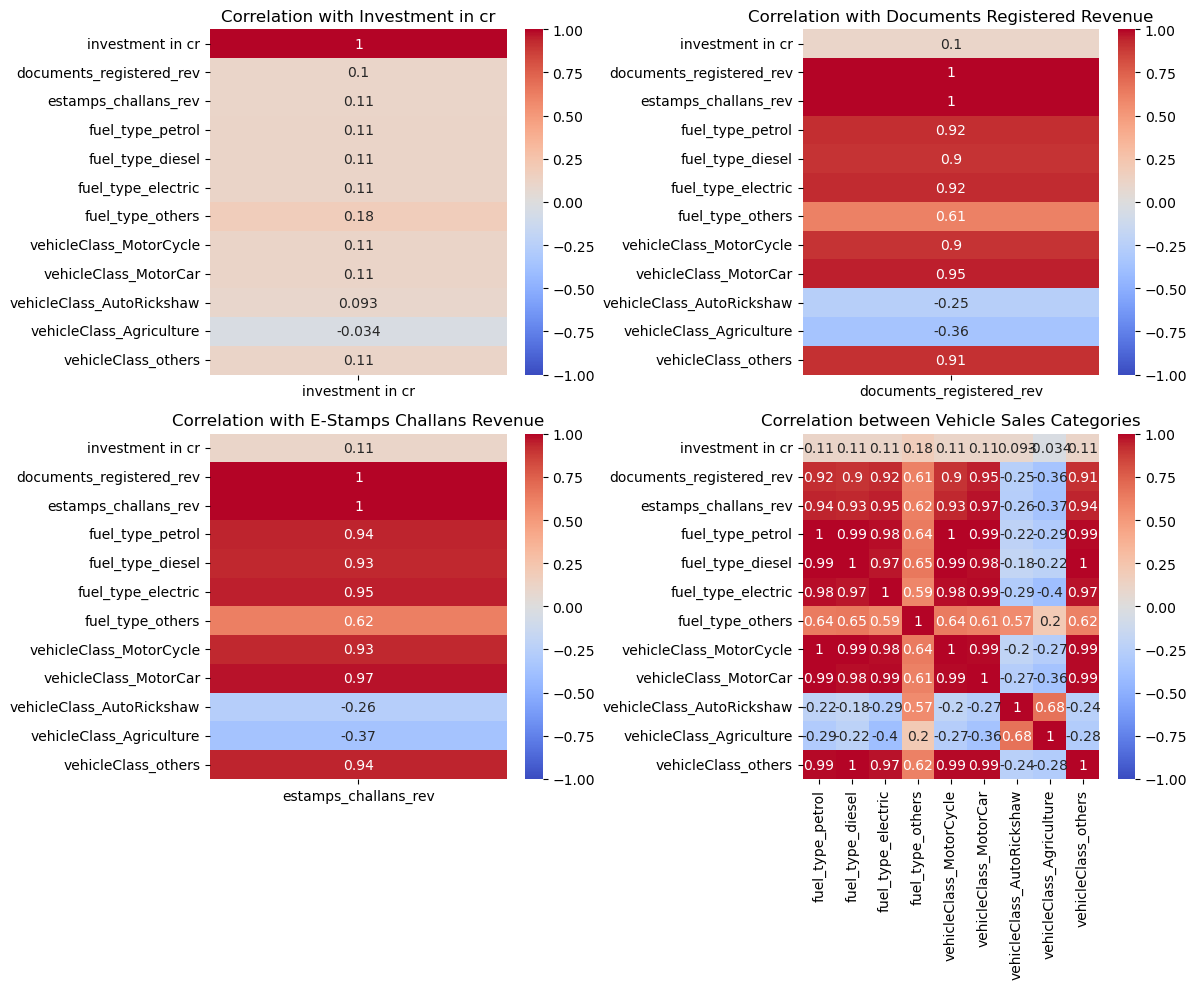

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load your datasets and preprocess as before

# Calculate correlation matrix
correlation_matrix = selected_df.corr()

# Set up subplots
plt.figure(figsize=(12, 10))

# Plot heatmap for the correlation matrix
plt.subplot(2, 2, 1)
sns.heatmap(correlation_matrix[['investment in cr']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Investment in cr')

plt.subplot(2, 2, 2)
sns.heatmap(correlation_matrix[['documents_registered_rev']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Documents Registered Revenue')

plt.subplot(2, 2, 3)
sns.heatmap(correlation_matrix[['estamps_challans_rev']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with E-Stamps Challans Revenue')

plt.subplot(2, 2, 4)
sns.heatmap(correlation_matrix.drop(['investment in cr', 'documents_registered_rev', 'estamps_challans_rev'], axis=1),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Vehicle Sales Categories')

# Adjust layout
plt.tight_layout()
plt.show()
